<a href="https://colab.research.google.com/github/FreddyEB/Artificial_Intelligence_T1/blob/master/AI_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset y repo
#!git clone https://github.com/jmsaavedrar/machine_learning
#!wget -O MNIST-5000.zip https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj&e=1&st=bz50c9jf&dl=1

--2024-08-18 20:24:07--  https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13701746f5f9354f5fcf5edf1d.dl.dropboxusercontent.com/cd/0/inline/CY4PSb8abvCtt-sFtCRwswvkST9ix-s4XM0vpKZr68SRL4kz55WyOoe6UbKAO7CDhg2e-4c-Rcd_Q3ERQfAh6Tpd-e3Id0pqL2f6vFy-6HTtgmTwWg6Hr0_6nLsbixOGcx29JcrJPFShgvvT7GX7MMAi/file# [following]
--2024-08-18 20:24:07--  https://uc13701746f5f9354f5fcf5edf1d.dl.dropboxusercontent.com/cd/0/inline/CY4PSb8abvCtt-sFtCRwswvkST9ix-s4XM0vpKZr68SRL4kz55WyOoe6UbKAO7CDhg2e-4c-Rcd_Q3ERQfAh6Tpd-e3Id0pqL2f6vFy-6HTtgmTwWg6Hr0_6nLsbixOGcx29JcrJPFShgvvT7GX7MMAi/file
Resolving uc13701746f5f9354f5fcf5edf1d.dl.dropboxusercontent.com (uc13701746f5f9354f5fcf5edf1d.dl.dropboxusercontent.com)... 162.125.4.15, 2620

In [ ]:
from google.colab import drive
import os
import cv2
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure
from tensorflow.keras.models import load_model
import tensorflow.keras.datasets as datasets
from keras.layers import TFSMLayer
from tensorflow.keras.preprocessing import image

#drive.mount('/content/drive')

In [ ]:
import zipfile
# extracción de la info del drive
zip_path = '/content/drive/MyDrive/AI_Data/Data.zip'
extract_path = '/content/data/'
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path) as zf:
    zf.extractall(extract_path)
os.listdir(extract_path)

['__MACOSX', 'MNIST-5000', 'mnist_model']

Train Images: (5000, 28, 28)
Valid Images: (500, 28, 28)


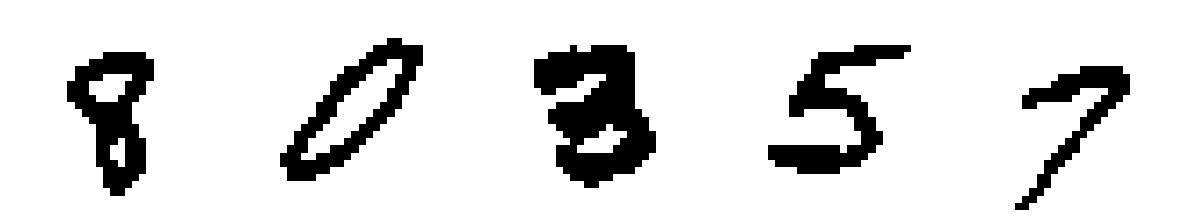

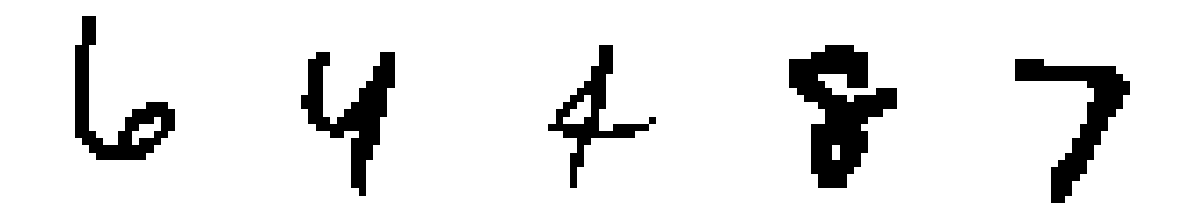

In [ ]:
# para ver la correcta extracción de la info del drive
train_images_path = '/content/data/MNIST-5000/train_images'
valid_images_path = '/content/data/MNIST-5000/valid_images'

def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
        img_array = image.img_to_array(img)
        images.append(img_array)
    return np.array(images)

train_images = load_images_from_directory(train_images_path)
valid_images = load_images_from_directory(valid_images_path)

train_images = train_images.squeeze().astype('uint8')
valid_images = valid_images.squeeze().astype('uint8')

print(f'Train Images: {train_images.shape}')
print(f'Valid Images: {valid_images.shape}')

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(train_images[i], cmap='gray')
    axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axs[i].imshow(valid_images[i], cmap='gray')
    axs[i].axis('off')
plt.show()

In [ ]:
import tensorflow.keras.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog


def getSample(n_rows, n_cols, data):
    size = 28
    image = np.ones((n_rows*size, n_cols*size), dtype = np.uint8)*255
    n = n_rows * n_cols
    idx = np.random.randint(data.shape[0], size = n)

    i = 0
    for r in np.arange(n_rows) :
            for c in np.arange(n_cols) :
                image[r * size:(r + 1) * size, c * size : (c + 1) * size] = data[idx[i], : , : ]
                i = i + 1

    return image

if __name__ == '__main__' :
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    print ('{} {}'.format(x_train.shape, x_train.dtype))
    print ('{} {}'.format(x_test.shape, x_train.dtype))
    digit = x_train[10,:,:];
    print(digit.shape)
    fd, hog_image = hog(digit, orientations=8, pixels_per_cell=(7,7),
                    cells_per_block=(1, 1), visualize=True)
    print(fd)
    fig, xs = plt.subplots(1,2)
    xs[0].imshow(digit, cmap = 'gray')
    xs[1].imshow(hog_image, cmap = 'gray')
    print(fd.shape)
    # image = getSample(10,20, x_train)
    #plt.imshow(image, cmap = 'gray')
    # plt.axis('off')
    plt.show()



# LINREG

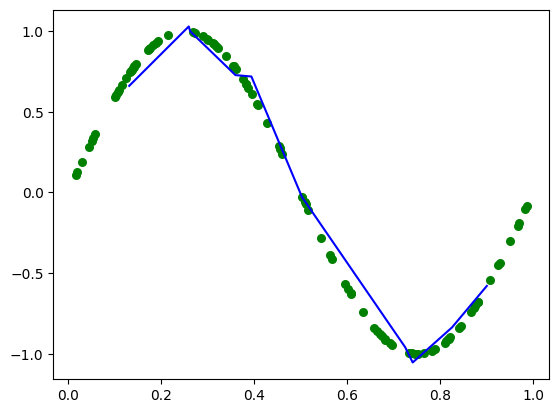

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

def polinomial_features(x, order) :
    #xp = np.array(x)
    xp= np.ones(x.shape)
    for i in range(order):#-1
        xp = np.vstack((xp, np.power(x, i + 1)))#+2
    xp = np.transpose(xp)
    return xp

polinomial_features(np.array([2,3,5]), 10).astype(int)

#build dataset
n_train = 10
n_test  = 100
x_train = np.random.rand(n_train)
x_train = np.sort(x_train)

x_test = np.random.rand(n_test)
x_test = np.sort(x_test)

y_train = np.sin(2*np.pi*x_train)
y_test = np.sin(2*np.pi*x_test)

noise = np.random.normal(loc = 0, scale = 0.05, size = n_train)
y_train_noisy = y_train + noise

plt.plot(x_train, y_train_noisy, 'b')
plt.scatter(x_test, y_test, s=30, color = 'g')
plt.show()

(100, 5)
(5,)


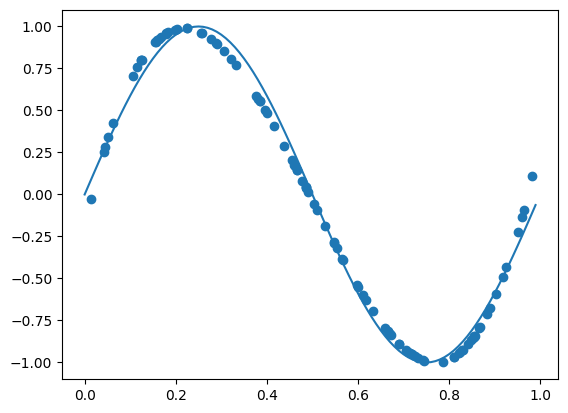

In [ ]:
class LinearRegression :
    def __init__(self):
        self.coeff = []

    def fit(self, X_train: np.ndarray, Y : np.ndarray )-> np.ndarray :
        ones = np.ones((X_train.shape[0],1))
        X = np.concatenate([ones, X_train], axis = 1)
        tX = np.transpose(X)
        invX =  np.linalg.pinv(np.matmul(tX, X))
        self.coeff = np.matmul(np.matmul(invX, tX), Y)
        return self.coeff

    def predict(self, X: np.ndarray):
        ones = np.ones((X.shape[0],1))
        X = np.concatenate([ones, X], axis = 1)
        print(X.shape)
        print(self.coeff.shape)
        y_pred =  np.matmul(X, self.coeff)
        return y_pred


#data preparation
order = 3
xp_train = polinomial_features(x_train, order=order)
xp_test = polinomial_features(x_test, order=order)
linreg=LinearRegression()
linreg.fit(xp_train,y_train)

pred_y_test=linreg.predict(xp_test)
plt.scatter(x_test,pred_y_test)
allx=np.arange(0,1,0.01)
plt.plot(allx,np.sin(2*np.pi*allx))

#linear regresion
# train
model = linear_model.LinearRegression()
model.fit(xp_train, y_train_noisy)
# predict
y_pred_train = model.predict(xp_train)
y_pred_test = model.predict(xp_test)

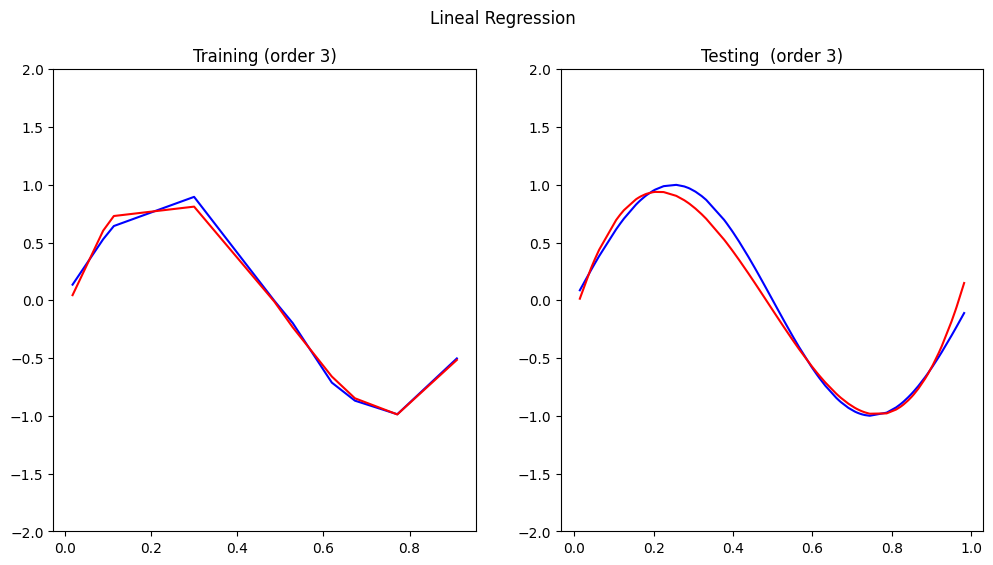

In [ ]:
def display_plots(x_train, y_train, x_test, y_test, y_pred_train, y_pred_test, order, title=''):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_ylim([-2, 2])
    ax[0].set_title('Training (order {})'.format(order))
    ax[1].set_ylim([-2, 2])
    ax[1].set_title('Testing  (order {})'.format(order))
    ax[0].plot(x_train, y_train, 'b')
    ax[0].plot(x_train, y_pred_train, 'r')
    ax[1].plot(x_test, y_test, 'b')
    ax[1].plot(x_test, y_pred_test, 'r')
    plt.suptitle(title)
    plt.show()
display_plots(x_train, y_train_noisy, x_test, y_test, y_pred_train, y_pred_test, order, title='Lineal Regression')

# LOGREG

In [ ]:
import numpy as np
import linear_models.activations as activations
import metrics.metrics as metrics

class LogRegression:
    def __init__(self):
        self.lr = 0.01
        self.coeff = None
        self.dim = None
        self.steps = 100
        self.min_error = 0.0001
        self.print_step = 10

    def fit(self, X_train:np.ndarray, y_train : np.ndarray) -> np.ndarray :
        ones = np.ones((X_train.shape[0],1))
        X = np.concatenate([ones, X_train], axis = 1)
        if len(y_train.shape) == 1 :
            y_train = np.expand_dims(y_train, axis = 1)
        print(y_train)
        self.dim = X.shape[1]
        self.coeff = np.random.normal(loc = 0, scale = 0.1, size = (self.dim,1))

        for i in range(self.steps) :
            y_pred = self.predict(X, add_ones = False)
            if i % self.print_step  == 0 :
                acc = metrics.accuracy(y_train, y_pred)
                print('it {} acc_train {}'.format(i,acc), flush = True)

            diff = (y_train - y_pred)
            adjust = diff * X
            adjust = np.mean(adjust, axis = 0, keepdims = True)
            adjust = np.transpose(adjust)
            self.coeff = self.coeff + self.lr * adjust

        return self.coeff


    def predict(self, X: np.ndarray, add_ones = True) -> np.ndarray :
        if add_ones :
            ones = np.ones((X.shape[0],1))
            X = np.concatenate([ones, X], axis = 1)
        y_pred =  np.matmul(X, self.coeff)
        y_pred = activations.sigmoid(y_pred)
        return y_pred


# ACTIVATIONS

In [ ]:
#activation functions
def sigmoid(x: np.ndarray) -> np.ndarray :
    out = 1.0 / (1 + np.exp(-x))
    return out

def sigmoid_derivative(x: np.ndarray) -> np.ndarray :
    sig = sigmoid(x)
    out = sig*(1 - sig)
    return out

def softmax(x: np.ndarray, axis = 0):
    e_x = np.exp(x - np.max(x, axis = axis, keepdims = True))
    sm  = np.sum(e_x, axis = axis, keepdims = True)
    return e_x / sm

# METRICS

In [ ]:
#coefficient of determination
import numpy as np

def r2score(y_true, y_pred):
    mu = np.mean(y_true)
    sigma = np.sum(np.square(y_true - mu))
    sigma_r = np.sum(np.square(y_true - y_pred))
    return 1 - sigma_r / sigma

def accuracy(y_true, y_pred):
    y_pred = y_pred.copy()
    y_pred[y_pred < 0.5] = 0
    y_pred[y_pred >= 0.5] = 1
    acc = np.mean(np.equal(y_true,y_pred).astype(dtype = np.int32))
    return acc

def multiclass_accuracy(y_true, y_pred):
    y_pred = y_pred.copy()
    y_pred = np.argmax(y_pred, axis = 1, keepdims = False)
    acc = np.mean(np.equal(np.squeeze(y_true),np.squeeze(y_pred)).astype(dtype = np.int32))
    return acc

def confusion_matrix(y_true, y_pred, n_classes):
    y_pred = np.argmax(y_pred, axis = 1, keepdims = True)
    cm = np.zeros((n_classes, n_classes), dtype = np.int32)
    for cl_true in np.arange(n_classes) :
        y = y_pred[y_true == cl_true]
        for cl_pred in np.arange(n_classes) :
            cm[cl_true, cl_pred]= np.sum(y==cl_pred)
    return cm